In [1]:
import ROOT
from ROOT import larlite
from ROOT import TFile
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
import root_numpy as rn
import pandas as pd
from scipy.optimize import curve_fit
import math
from root_numpy import root2array, root2rec, tree2array, array2root
%matplotlib inline

In [4]:
FILENAME = "ana_showercal.root" #TFile("ana.root","READ")

gain_tree = rn.root2array(FILENAME,
                    treename='gain_tree',
                    branches=['_pl','wire','_tick',\
                              '_reco_area','_gain',\
                              '_q','event','_clus'])

wire_v = [gain_tree[i][1] for i in xrange(gain_tree.shape[0])]
tick_v = [gain_tree[i][2] for i in xrange(gain_tree.shape[0])]
gain_v = [gain_tree[i][4] for i in xrange(gain_tree.shape[0])]
entry_v = [gain_tree[i][6] for i in xrange(gain_tree.shape[0])]

print len(entry_v), len(wire_v), gain_tree.shape[0]

43503 43503 43503



NEW ENTRY !!  0

NEW ENTRY !!  1

NEW ENTRY !!  2

NEW ENTRY !!  3

NEW ENTRY !!  5

NEW ENTRY !!  6

NEW ENTRY !!  8

NEW ENTRY !!  9

NEW ENTRY !!  10

NEW ENTRY !!  11

NEW ENTRY !!  12

NEW ENTRY !!  13

NEW ENTRY !!  14

NEW ENTRY !!  15

NEW ENTRY !!  16

NEW ENTRY !!  18

NEW ENTRY !!  19

NEW ENTRY !!  20

NEW ENTRY !!  21

NEW ENTRY !!  22

NEW ENTRY !!  23

NEW ENTRY !!  25

NEW ENTRY !!  26

NEW ENTRY !!  27

NEW ENTRY !!  29

NEW ENTRY !!  32

NEW ENTRY !!  35

NEW ENTRY !!  36

NEW ENTRY !!  37

NEW ENTRY !!  38

NEW ENTRY !!  40

NEW ENTRY !!  41

NEW ENTRY !!  42

NEW ENTRY !!  43

NEW ENTRY !!  44

NEW ENTRY !!  45

NEW ENTRY !!  46

NEW ENTRY !!  47

NEW ENTRY !!  49

NEW ENTRY !!  51

NEW ENTRY !!  53

NEW ENTRY !!  54

NEW ENTRY !!  56

NEW ENTRY !!  57

NEW ENTRY !!  58

NEW ENTRY !!  59

NEW ENTRY !!  61

NEW ENTRY !!  62

NEW ENTRY !!  63

NEW ENTRY !!  64

NEW ENTRY !!  66

NEW ENTRY !!  67

NEW ENTRY !!  69

NEW ENTRY !!  70

NEW ENTRY !!  72

NEW ENTRY !!  73


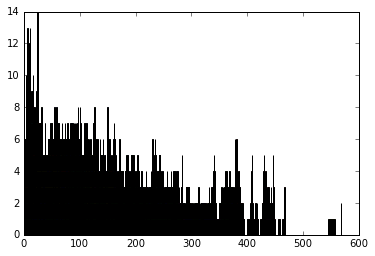

In [5]:
gain_for_tick = []
tick_diff = []

for k in np.unique(entry_v):
    print "NEW ENTRY !! ", k
    if k > 300: break
    wire_entry_v = [wire_v[i] for i in xrange(gain_tree.shape[0]) if entry_v[i] == k]
    tick_entry_v = [tick_v[i] for i in xrange(gain_tree.shape[0]) if entry_v[i] == k]
    gain_entry_v = [gain_v[i] for i in xrange(gain_tree.shape[0]) if entry_v[i] == k]
    
    x = np.arange(min(wire_entry_v),max(wire_entry_v)+1,1)
    y = np.arange(min(tick_entry_v),max(tick_entry_v)+1,6) 

    display = np.zeros([len(y),len(x)])

    new_wire_v = [ wire_entry_v[i] - min(wire_entry_v) for i in xrange(len(wire_entry_v))]
    new_tick_v = [ (tick_entry_v[i] - min(tick_entry_v))/6 for i in xrange(len(tick_entry_v))]

    for i in xrange(len(new_wire_v)):
    
        t = new_tick_v[i]
        w = new_wire_v[i]
        display[t][w] = gain_entry_v[i]
    
#     plt.figure(figsize=(10, 5))
#     plt.title('colorMap')
#     plt.imshow(display) #gist_heat')
#     plt.gca().invert_yaxis()
#     plt.xlabel("Wire")
#     plt.ylabel("Time")
#     plt.colorbar(orientation='vertical',label='Gain')#,cmap='Ancient')#,boundaries=[100,1000],values=[100,1000])
    
#   plt.figure()
    bins,_,_ = plt.hist(new_wire_v,max(new_wire_v)-min(new_wire_v))
    high_mult_wire_v = [i for i in xrange(len(bins)-1) if bins[i] > 1]

    for i in high_mult_wire_v:
    
        idx_v = sorted(np.nonzero(display[:,i])[0]) 
        #print "INDICES : ", idx_v
        
        for j in xrange(len(idx_v)):
        
            gain_for_tick.append(display[:,i][idx_v[j]])

            if j == 0 :
                tick_diff.append(idx_v[j+1] - idx_v[j])
            elif j == len(idx_v) - 1:
                tick_diff.append(idx_v[j] - idx_v[j-1])
            else:
                temp_min = min( idx_v[j+1] - idx_v[j], idx_v[j] - idx_v[j-1])
                tick_diff.append(temp_min)
    #print "TICK DIFS: ", tick_diff

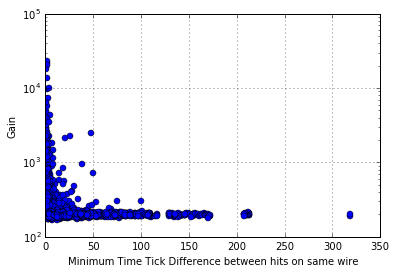

In [7]:
plt.plot(tick_diff,gain_for_tick,'bo')
plt.xlabel('Minimum Time Tick Difference between hits on same wire')
plt.ylabel('Gain')
plt.yscale('log')
plt.grid(True)

In [177]:
#http://statsmodels.sourceforge.net/
# Perform an ordinary least squares fit + evaluate influence of points to exclude outliers
import statsmodels.api as sm

UR_fit = sm.add_constant(wire_v)
model = sm.OLS(gain_v,UR_fit).fit()

influ_v = model.get_influence()
influ_s = influ_v.summary_frame()['student_resid']
outliers = influ_s.ix[abs(influ_s) > .75] # 0.1 Chosen visually

gain_out = [ gain_v[i] for i in xrange(len(gain_v)) if i in outliers ]
wire_out = [ wire_v[i] for i in xrange(len(gain_v)) if i in outliers ]
tick_out = [ tick_v[i] for i in xrange(len(gain_v)) if i in outliers ]

In [178]:
# plt.figure()
# plt.plot(wire_v,gain_v,'bo',label='All gains')
# plt.plot(wire_out,gain_out,'ro',label='Outliers')
# plt.xlabel("Wire")
# plt.ylabel("Gain")
# plt.grid(True)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.figure()
# plt.plot(tick_v,gain_v,'bo',label='All gains')
# plt.plot(tick_out,gain_out,'ro',label='Outliers')
# plt.xlabel("Tick")
# plt.ylabel("Gain")
# plt.grid(True)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

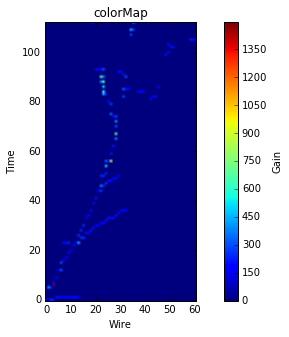

In [91]:
plt.figure(figsize=(10, 5))
plt.title('colorMap')
plt.imshow(display)#,cmap='hot') #gist_heat')
#plt.plot(new_wire_out,new_tick_out,'ro',alpha=0.7)#,label='showers')
plt.gca().invert_yaxis()
plt.xlabel("Wire")
plt.ylabel("Time")

plt.colorbar(orientation='vertical',label='Gain')#,cmap='Ancient')#,boundaries=[100,1000],values=[100,1000])
plt.show()


In [ ]:
bins,_,_ = plt.hist(new_wire_v,max(new_wire_v)-min(new_wire_v))

max_gains = [ max(display[:,i]) for i in xrange(display.shape[1])]
min_gains = []
for i in xrange(display.shape[1]):
    
    temp_sum = np.cumsum(display[:,i])[-1]
 
    if temp_sum == 0.:
        min_gains.append(0)
    else:
        temp = np.nonzero(display[:,i])
        min_gains.append(min(display[:,i][temp]))


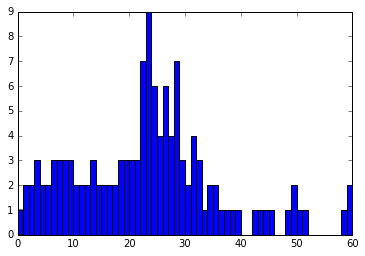

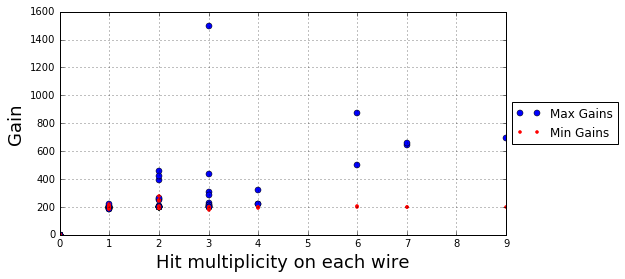

In [92]:
plt.figure(figsize=(8, 4))
plt.plot(bins,max_gains[:-1],'bo',label='Max Gains')
plt.plot(bins,min_gains[:-1],'r.',label='Min Gains')
plt.grid(True)
plt.xlabel("Hit multiplicity on each wire",fontsize=18)
plt.ylabel("Gain",fontsize=18)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

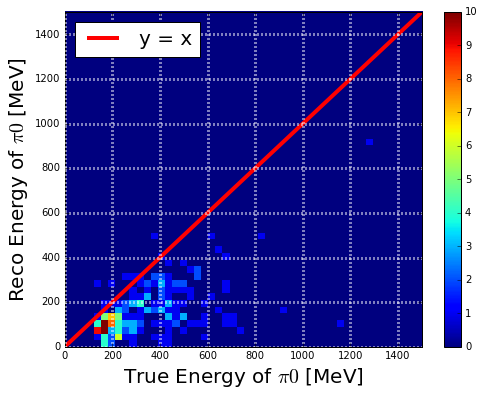

In [10]:
x = np.arange(0,3000,10)

plt.figure(figsize=(8,6))
plt.hist2d(true_e,reco_e,bins=50,\
           range=np.array([(0,1500), (0,1500)])) #, norm=LogNorm())
plt.plot(x,x,'r-',label='y = x',lw=4)
plt.grid(True,color='w',lw=3)
plt.xlabel("True Energy of $\pi0$ [MeV]",fontsize=20)
plt.ylabel("Reco Energy of $\pi0$ [MeV]",fontsize=20)
plt.legend(loc=2,fontsize=20)
plt.colorbar()
plt.savefig("Plots/RecoMCEnergyCompare.png")
plt.show()

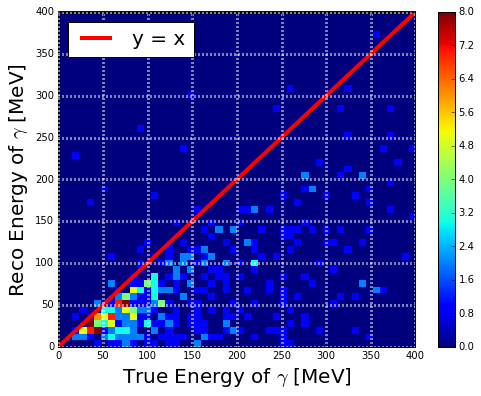

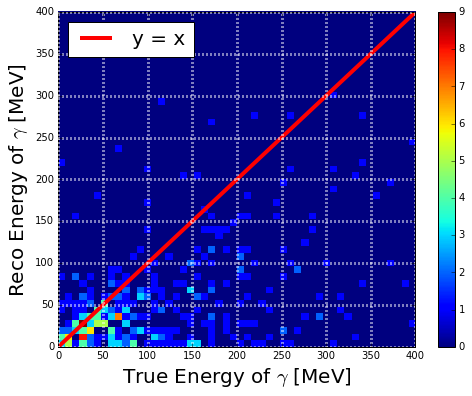

In [13]:
x = np.arange(0,800,10)

plt.figure(figsize=(8,6))
plt.hist2d(true_gamma_e,reco_gamma_e,bins=50,\
           range=np.array([(0,400), (0,400)])) #, norm=LogNorm())
plt.plot(x,x,'r-',label='y = x',lw=4)
plt.grid(True,color='w',lw=3)
plt.xlabel("True Energy of $\gamma$ [MeV]",fontsize=20)
plt.ylabel("Reco Energy of $\gamma$ [MeV]",fontsize=20)
plt.legend(loc=2,fontsize=20)
plt.colorbar()
plt.savefig("Plots/RecoMCEnergyCompare.png")
plt.show()

plt.figure(figsize=(8,6))
plt.hist2d(true_adj_gamma_e,reco_adj_gamma_e,bins=50,\
           range=np.array([(0,400), (0,400)])) #, norm=LogNorm())
plt.plot(x,x,'r-',label='y = x',lw=4)
plt.grid(True,color='w',lw=3)
plt.xlabel("True Energy of $\gamma$ [MeV]",fontsize=20)
plt.ylabel("Reco Energy of $\gamma$ [MeV]",fontsize=20)
plt.legend(loc=2,fontsize=20)
plt.colorbar()
plt.savefig("Plots/RecoMCEnergyCompare.png")
plt.show()